In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from IPython.display import display
#from pandas import ExcelWriter
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
df = pd.read_csv('la-haute-borne-data-2013-2016-all.csv',sep=';')

In [4]:
len(df.columns.values)

138

In [6]:
df.dtypes

Wind_turbine_name     object
Date_time             object
Ba_avg               float64
Ba_min               float64
Ba_max               float64
Ba_std               float64
Rt_avg               float64
Rt_min               float64
Rt_max               float64
Rt_std               float64
DCs_avg              float64
DCs_min              float64
DCs_max              float64
DCs_std              float64
Cm_avg               float64
Cm_min               float64
Cm_max               float64
Cm_std               float64
P_avg                float64
P_min                float64
P_max                float64
P_std                float64
Q_avg                float64
Q_min                float64
Q_max                float64
Q_std                float64
S_avg                float64
S_min                float64
S_max                float64
S_std                float64
                      ...   
Nf_max               float64
Nf_std               float64
Nu_avg               float64
Nu_min        

In [5]:
df.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80711,2013-01-06T05:20:00-05:00,-0.76,-1.0,0.00,0.40,13.78,13.0,14.0,0.35,...,NaN,NaN,293.01001,NaN,NaN,NaN,293.87,NaN,NaN,NaN
1,R80711,2013-01-06T01:30:00-05:00,-0.39,-1.0,0.07,0.35,13.00,13.0,13.0,0.00,...,NaN,NaN,263.41998,NaN,NaN,NaN,223.98,NaN,NaN,NaN
2,R80711,2013-01-06T08:00:00-05:00,-0.95,-1.0,0.00,0.17,14.00,14.0,14.0,0.00,...,NaN,NaN,305.81000,NaN,NaN,NaN,293.87,NaN,NaN,NaN
3,R80711,2013-01-06T03:50:00-05:00,-1.00,-1.0,-1.00,0.00,13.15,13.0,14.0,0.27,...,NaN,NaN,285.79999,NaN,NaN,NaN,293.87,NaN,NaN,NaN
4,R80711,2013-01-10T11:30:00-05:00,-1.00,-1.0,-1.00,0.00,9.56,9.0,10.0,0.42,...,NaN,NaN,201.86000,NaN,NaN,NaN,207.17,NaN,NaN,NaN


In [18]:
df.loc[1:10,['Wa_c_avg', 'Wa_avg', 'Ot_avg', 'Yt_avg', 'Rt_avg']]

,Wa_c_avg,Wa_avg,Ot_avg,Yt_avg,Rt_avg
1,263.41998,248.42000,5.62,21.549999,13.00
2,305.81000,290.81000,6.53,19.250000,14.00
3,285.79999,270.79999,6.20,24.770000,13.15
4,201.86000,186.86000,3.50,19.700001,9.56
5,22.01000,7.01000,-3.01,11.420000,6.00
6,37.77000,22.77000,5.25,20.570000,12.65
7,285.53000,270.53000,6.40,22.100000,13.00
8,302.87000,287.87000,5.51,23.299999,13.00
9,343.69000,328.69000,4.45,18.809999,10.01
10,313.35001,298.35001,4.77,20.610001,12.95


In [4]:
df.Wind_turbine_name.unique()

array(['R80711', 'R80736', 'R80790', 'R80721'], dtype=object)

In [5]:
descript = pd.read_csv('data_description.csv', sep=';')

In [6]:
descript

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Va2,Vane_position_2,deg,Second wind vane on the nacelle
1,Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
2,Ws,Wind_speed,m/s,Average wind speed
3,Wa_c,Absolute_wind_direction_corrected,deg,NaN
4,Na_c,Nacelle_angle_corrected,deg,NaN
5,Ot,Outdoor_temperature,deg_C,NaN
6,Yt,Nacelle_temperature,deg_C,NaN
7,Nf,Grid_frequency,Hz,NaN
8,Nu,Grid_voltage,V,NaN
9,Rm,Torque,Nm,NaN


In [8]:
stat = pd.read_csv('static-information.csv', sep=';')

In [9]:
stat

,Wind_turbine_name,Wind_turbine_long_name,Manufacturer,Model,Rated power (kW),Hub height (m),Rotor diameter (m),GPS,Altitude (m),Commissioning date,Department,Region
0,R80736,FRHBO_E04_80736,Senvion,MM82,2050,80,82,"48.4461, 5.5925",411,2009-01-15,Meuse,Grand Est
1,R80711,FRHBO_E01_80711,Senvion,MM82,2050,80,82,"48.4569, 5.5847",411,2009-01-15,Meuse,Grand Est
2,R80790,FRHBO_E02_80790,Senvion,MM82,2050,80,82,"48.4536, 5.5875",411,2009-01-15,Meuse,Grand Est
3,R80721,FRHBO_E03_80721,Senvion,MM82,2050,80,82,"48.4497, 5.5869",411,2009-01-15,Meuse,Grand Est


In [9]:
# Defining the columns to keep
cols_2_keep = ['Date_time', 'P_avg', 'Ws_avg', 'Wa_c_avg', 'Ot_avg']

# process the data
turbines = {}
index = 1
for name in df.Wind_turbine_name.unique():
    # Splitting data based on wind turbine (1-4)
    turbine_name = 'turbine_{}'.format(index)
    turbine_data = df.loc[df['Wind_turbine_name'] == name]
    
    # Cleaning each turbine data by removing Nan's in the wind speed column
    turbine_data_clean = turbine_data[np.isfinite(turbine_data['Ws_avg'])]
    turbines[turbine_name] = turbine_data_clean.loc[:, cols_2_keep]
    index += 1

In [10]:
turbines['turbine_1'].head()

,Date_time,P_avg,Ws_avg,Wa_c_avg,Ot_avg
0,2013-01-06T05:20:00-05:00,87.900002,4.76,293.01001,6.57
1,2013-01-06T01:30:00-05:00,35.970001,4.29,263.41998,5.62
2,2013-01-06T08:00:00-05:00,108.670000,4.96,305.81000,6.53
3,2013-01-06T03:50:00-05:00,182.300000,5.28,285.79999,6.20
4,2013-01-10T11:30:00-05:00,454.200010,6.60,201.86000,3.50


In [11]:
# Converting date_time column to datetime variable and picking out day,month,hour,minute and year
for key in turbines.keys():
    turbines[key]['Date_time'] = pd.to_datetime(turbines[key]['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
    turbines[key]['Day'] = turbines[key]['Date_time'].dt.day;
    turbines[key]['Month'] = turbines[key]['Date_time'].dt.month;
    turbines[key]['Hour'] = turbines[key]['Date_time'].dt.hour;
    turbines[key]['Minute'] = turbines[key]['Date_time'].dt.minute;
    turbines[key]['Year'] = turbines[key]['Date_time'].dt.year;

# Sorting the rows based on the date time
for key in turbines.keys():
    turbine_sorted = turbines[key].sort_values(by = 'Date_time')
    turbines[key] = turbine_sorted.set_index('Date_time')
    
turbines['turbine_1'].head()

,P_avg,Ws_avg,Wa_c_avg,Ot_avg,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,
2012-12-31 23:00:00,1072.6500,8.960000,180.25000,5.09,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,8.890000,183.28999,5.26,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,9.190000,185.08000,5.56,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,8.920000,190.33000,5.70,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,9.479999,188.07001,5.82,31,12,23,40,2012


In [12]:
# use the intersection of time of all 4 turbines and keep the common times
idx = turbines['turbine_1'].index.intersection(turbines['turbine_2'].index)
idx2 = turbines['turbine_3'].index.intersection(idx)
idx3 = turbines['turbine_4'].index.intersection(idx2)

for key in turbines.keys():
    turbines[key] = turbines[key].loc[idx3]
    
print (len(turbines['turbine_1']))
print (len(turbines['turbine_2']))
print (len(turbines['turbine_3']))
print (len(turbines['turbine_4']))
turbines['turbine_1'].head()

207789
207789
207789
207789


,P_avg,Ws_avg,Wa_c_avg,Ot_avg,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,
2012-12-31 23:00:00,1072.6500,8.960000,180.25000,5.09,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,8.890000,183.28999,5.26,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,9.190000,185.08000,5.56,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,8.920000,190.33000,5.70,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,9.479999,188.07001,5.82,31,12,23,40,2012


In [13]:
df1 = turbines['turbine_1'].copy()
df2 = turbines['turbine_2'].copy()
df3 = turbines['turbine_3'].copy()
df4 = turbines['turbine_4'].copy()

In [14]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df4.dropna(inplace=True)

In [15]:
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))

200329
200329
200329
200329


# Plotting power curves

Text(0,0.5,'Power (P_avg)')

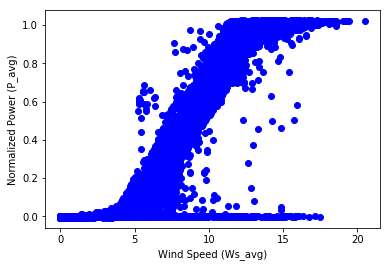

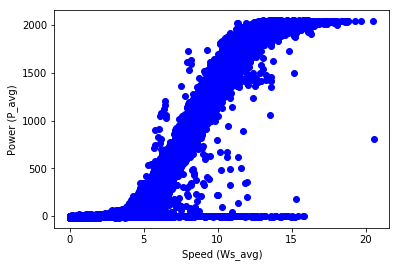

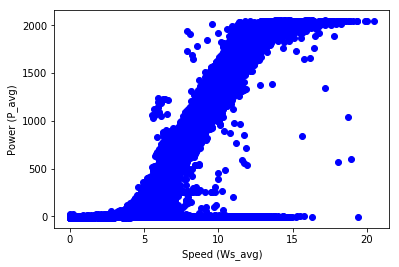

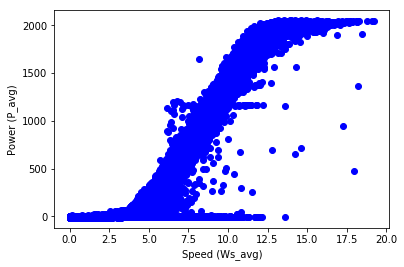

In [16]:
# Turbine 1
plt.figure(1)
plt.plot(df1.Ws_avg, df1.P_avg/2000,'bo')
plt.xlabel('Wind Speed (Ws_avg)')
plt.ylabel('Normalized Power (P_avg)')

# Turbine 2
plt.figure(2)
plt.plot(df2.Ws_avg, df2.P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

# Turbine 3
plt.figure(3)
plt.plot(df3.Ws_avg, df3.P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

# Turbine 4
plt.figure(4)
plt.plot(df4.Ws_avg, df4.P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

# Wind farm capacity factor

In [21]:
total = sum(turbines['turbine_1'].P_avg+turbines['turbine_2'].P_avg+turbines['turbine_3'].P_avg+turbines['turbine_4'].P_avg)/8000
total/200329

0.1716803191417467

In [78]:
X = df1[['Ws_avg', 'Wa_c_avg', 'Ot_avg', 'Day', 'Month', 'Hour', 'Minute', 'Year']].values
Y = df1['P_avg'].values

,P_avg,Ws_avg,Wa_c_avg,Ot_avg,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,
2016-12-31 22:10:00,-0.560000,3.30,195.14000,3.83,31,12,22,10,2016
2016-12-31 22:20:00,-0.730000,3.46,196.17999,3.66,31,12,22,20,2016
2016-12-31 22:30:00,20.950001,3.87,195.72000,3.52,31,12,22,30,2016
2016-12-31 22:40:00,54.900002,4.37,196.32001,3.62,31,12,22,40,2016
2016-12-31 22:50:00,94.010002,4.80,198.25000,3.73,31,12,22,50,2016


In [85]:
labels = ['Ws_avg', 'Wa_c_avg', 'Ot_avg', 'Day', 'Month', 'Hour', 'Minute', 'Year']; labels

['Ws_avg', 'Wa_c_avg', 'Ot_avg', 'Day', 'Month', 'Hour', 'Minute', 'Year']

In [156]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train = X[:150000]
y_train = Y[:150000]
X_test = X[150000:]
y_test = Y[150000:]

In [157]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
df4.isnull().values.any()

False

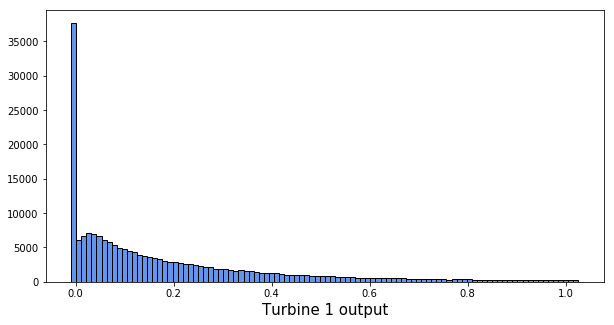

In [112]:
# Plot histogram of turbine output, summed over all turbines
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )
axes.hist(df1['P_avg']/2000, bins=100, range=None, normed=False, histtype='bar', align='mid', 
          orientation='vertical', log=False, color='cornflowerblue', edgecolor='k', label=None)
axes.set_xlabel("Turbine 1 output", fontsize=15)
plt.show()
#fig.savefig('wind_turbine_outputs.png', dpi=200, bbox_inches='tight')

In [117]:
cf1 = sum(df1['P_avg']/2000)/len(df1)
cf2 = sum(df2['P_avg']/2000)/len(df2)
cf3 = sum(df3['P_avg']/2000)/len(df3)
cf4 = sum(df4['P_avg']/2000)/len(df4)

In [118]:
print(cf1,cf2,cf3,cf4)

0.191825173063 0.167114244594 0.147541583264 0.155193224396


# Random Forest Regression

In [82]:
#model = RandomForestRegressor(n_jobs=-1, min_impurity_decrease=10)
model = RandomForestRegressor(n_jobs=-1)

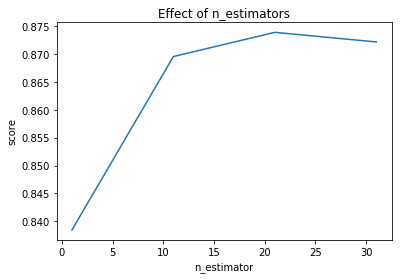

In [135]:
# Try different numbers of n_estimators or trees - this will take a minute or so
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [136]:
y_predicted = model.predict(X_test)

In [137]:
result = pd.DataFrame()
result['feature'] = labels
result['importance'] = model.feature_importances_
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
0,Ws_avg,0.954378
2,Ot_avg,0.012445
3,Day,0.010726
1,Wa_c_avg,0.007935
4,Month,0.007299
5,Hour,0.003182
7,Year,0.002865
6,Minute,0.001170


In [87]:
from sklearn.metrics import r2_score

In [138]:
score = r2_score(y_test, y_predicted)
score

0.87217063023644237

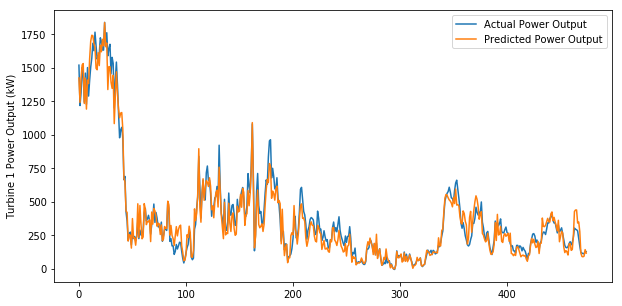

In [204]:
plt.figure(figsize=(10,5))
plt.plot(y_test[225:700], label='Actual Power Output')
plt.plot(y_predicted[225:700], label='Predicted Power Output')
#plt.xlabel('Time')
plt.ylabel('Turbine 1 Power Output (kW)')
plt.legend(loc='upper right')

array([  5.89820010e+02,   5.05929990e+02,   2.28820010e+02, ...,
        -3.49999990e-01,   7.25340030e+02,   3.92250000e+02])

# Predicting wind speed instead of power

In [146]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Mean squared error: 0.37


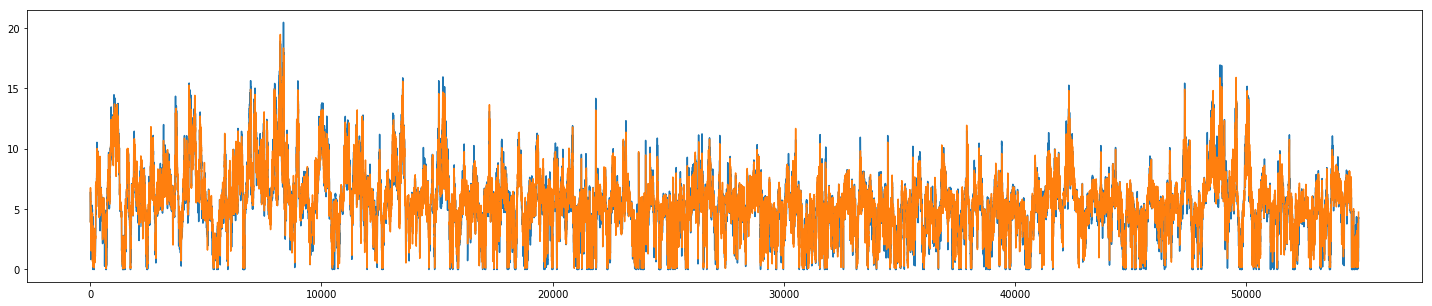

In [151]:
# Getting X vector from turbine 1 data sequentially

x_turb_1_train = df1[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg', 'Wa_c_avg', 'Ot_avg', 'Day', 'Month', 'Hour', 'Minute', 'Year']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = df1[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg', 'Wa_c_avg', 'Ot_avg', 'Day', 'Month', 'Hour', 'Minute', 'Year']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 3 data

y_turb_3_train = df3[0:145452]
y_turb_3_train = y_turb_3_train.loc[:,['Ws_avg']]
y_train = np.array(y_turb_3_train)

y_turb_3_test = df3[145452:]
y_turb_3_test = y_turb_3_test.loc[:,['Ws_avg']]
y_test = np.array(y_turb_3_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them
plt.figure(figsize=(25,5))
plt.plot(y_test)
plt.plot(y_pred)

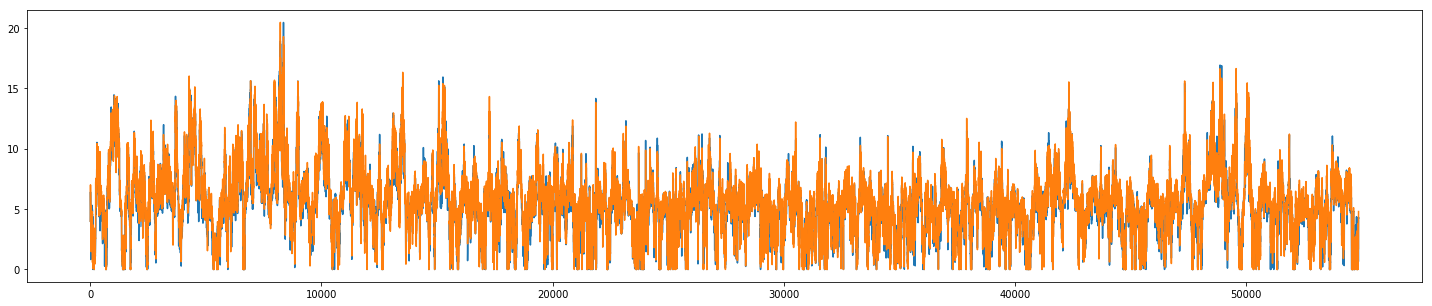

In [152]:
plt.figure(figsize=(25,5))
plt.plot(y_test)
plt.plot(np.array(df1.Ws_avg)[145452:])

In [153]:
import xgboost as xgb

In [154]:
model = xgb.XGBRegressor()

In [158]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [159]:
y_preds = model.predict(X_test)

In [160]:
preds = [round(i) for i in y_preds]

In [161]:
from sklearn.metrics import explained_variance_score

In [167]:
print(explained_variance_score(preds,y_test))

0.877122086908


In [169]:

from  sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [170]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: ", results.mean())

Accuracy:  0.914521705401


([], [])


ValueError: not enough values to unpack (expected 2, got 1)

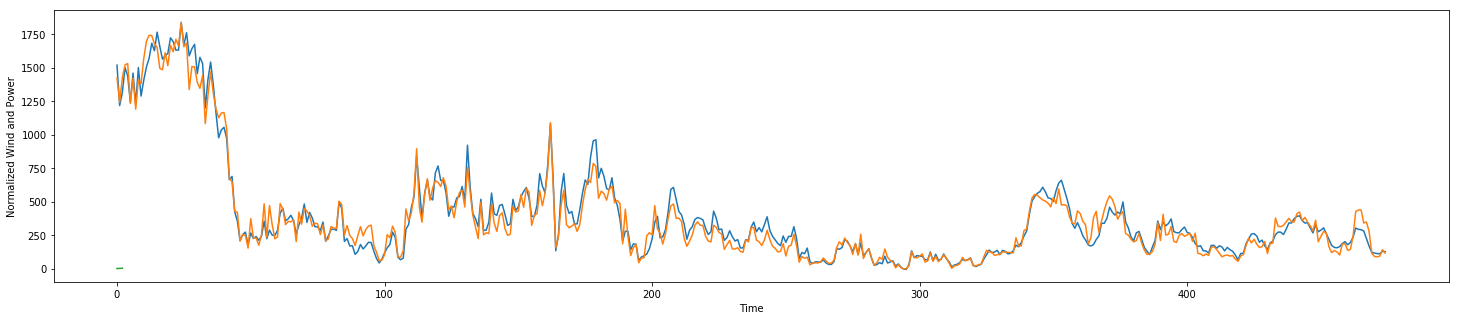

In [203]:
plt.figure(figsize=(25,5))
plt.plot(y_test[225:700])
plt.plot(y_predicted[225:700])
plt.xlabel('Time')
plt.ylabel('Normalized Wind and Power')
plt.legend(loc='upper right')
ax = plt.gca()
l = ax.get_legend_handles_labels()
print(l)
line1, line2 = ax.plot([1, 2, 3], label='Inline label')
# Overwrite the label by calling the method.
line1.set_label('Actual Power Output')
line2.set_label('Predicted Power Output')
ax.legend()

In [185]:
maxwind = df1.loc[df1['Ws_avg'].idxmax(), 'Ws_avg']
maxpower = df1.loc[df1['P_avg'].idxmax(), 'P_avg']
maxpower

2051.3798999999999

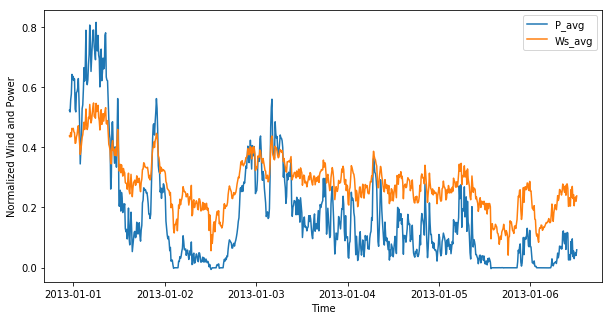

In [193]:
plt.figure(figsize=(10,5))
plt.plot(df1['P_avg'][:800]/maxpower)
plt.plot(df1['Ws_avg'][:800]/maxwind)
plt.xlabel('Time')
plt.ylabel('Normalized Wind and Power')
plt.legend(loc='upper right')

In [5]:
# Defining the columns to keep
cols_2_keep = ['Date_time', 'P_avg', 'P_min', 'P_max', 'P_std', 'Ws1_avg', 'Ws1_min', 'Ws1_max', 'Ws1_std', 'Ws2_avg', 'Ws2_min', \
               'Ws2_max', 'Ws2_std', 'Ws_avg', 'Ws_min', 'Ws_max', 'Ws_std']

# process the data
turbines = {}
index = 1
for name in wind_data.Wind_turbine_name.unique():
    # Splitting data based on wind turbine (1-4)
    turbine_name = 'turbine_{}'.format(index)
    turbine_data = wind_data.loc[wind_data['Wind_turbine_name'] == name]
    
    # Cleaning each turbine data by removing Nan's in the wind speed column
    turbine_data_clean = turbine_data[np.isfinite(turbine_data['Ws1_avg'])]
    turbines[turbine_name] = turbine_data_clean.loc[:, cols_2_keep]
    index += 1

In [6]:
# Converting date_time column to datetime variable and picking out day,month,hour,minute and year
for key in turbines.keys():
    turbines[key]['Date_time'] = pd.to_datetime(turbines[key]['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
    turbines[key]['Day'] = turbines[key]['Date_time'].dt.day;
    turbines[key]['Month'] = turbines[key]['Date_time'].dt.month;
    turbines[key]['Hour'] = turbines[key]['Date_time'].dt.hour;
    turbines[key]['Minute'] = turbines[key]['Date_time'].dt.minute;
    turbines[key]['Year'] = turbines[key]['Date_time'].dt.year;

# Sorting the rows based on the date time
for key in turbines.keys():
    turbine_sorted = turbines[key].sort_values(by = 'Date_time')
    turbines[key] = turbine_sorted.set_index('Date_time')
    
turbines['turbine_1'].head()

,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [32]:
turbines['turbine_1'].tail()

,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-31 22:10:00,-0.560000,-1.080000,-0.260000,0.13,3.40,2.88,3.71,0.16,3.21,2.46,...,0.20,3.30,2.68,3.65,0.17,31,12,22,10,2016
2016-12-31 22:20:00,-0.730000,-1.420000,-0.250000,0.23,3.58,3.11,3.97,0.16,3.34,2.71,...,0.18,3.46,2.97,3.84,0.16,31,12,22,20,2016
2016-12-31 22:30:00,20.950001,-18.209999,162.580000,28.50,3.93,2.86,5.34,0.38,3.81,2.94,...,0.38,3.87,2.92,5.23,0.37,31,12,22,30,2016
2016-12-31 22:40:00,54.900002,43.990002,71.650002,8.97,4.42,3.55,5.45,0.40,4.32,3.37,...,0.35,4.37,3.62,5.35,0.35,31,12,22,40,2016
2016-12-31 22:50:00,94.010002,67.050003,107.070000,10.07,4.89,3.50,5.96,0.43,4.71,3.53,...,0.35,4.80,3.51,5.74,0.35,31,12,22,50,2016


In [7]:
# use the intersection of time of all 4 turbines and keep the common times
idx = turbines['turbine_1'].index.intersection(turbines['turbine_2'].index)
idx2 = turbines['turbine_3'].index.intersection(idx)
idx3 = turbines['turbine_4'].index.intersection(idx2)

for key in turbines.keys():
    turbines[key] = turbines[key].loc[idx3]
    
print (len(turbines['turbine_1']))
print (len(turbines['turbine_2']))
print (len(turbines['turbine_3']))
print (len(turbines['turbine_4']))
turbines['turbine_1'].head()

207789
207789
207789
207789


,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [8]:
turbines['turbine_1'].columns.values

array(['P_avg', 'P_min', 'P_max', 'P_std', 'Ws1_avg', 'Ws1_min',
       'Ws1_max', 'Ws1_std', 'Ws2_avg', 'Ws2_min', 'Ws2_max', 'Ws2_std',
       'Ws_avg', 'Ws_min', 'Ws_max', 'Ws_std', 'Day', 'Month', 'Hour',
       'Minute', 'Year'], dtype=object)

In [9]:
np.any(np.isnan(turbines['turbine_4']))

False

In [10]:
turbines['turbine_4'].shape

(207789, 21)

# Getting the X matrix as 70% of the features (sequentially)
## Right now, use turbine 1 to predict turbine 2, 3, 4

In [66]:
# Getting X vector from turbine 1 data sequentially
x_turb_1_train = turbines['turbine_1'][0:100]#145452]
x_turb_1_train = x_turb_1_train.iloc[:,4:]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbines['turbine_1'][100:110]
x_turb_1_test = x_turb_1_test.iloc[:,4:]#['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

x_train.shape

(100L, 17L)

In [67]:
# Getting Y vector from turbine 1 data
y_turb_1_train = turbines['turbine_1'][0:100]#145452
y_turb_1_train = y_turb_1_train.loc[:,['P_avg']]
y_train = np.array(y_turb_1_train)

y_turb_1_test = turbines['turbine_1'][100:110]
y_turb_1_test = y_turb_1_test.loc[:,['P_avg']]
y_test = np.array(y_turb_1_test)

y_train.shape

(100L, 1L)

In [13]:
import algorithms

In [30]:
nonpar = algorithms.NonparametricRegression()

In [44]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 46731.84


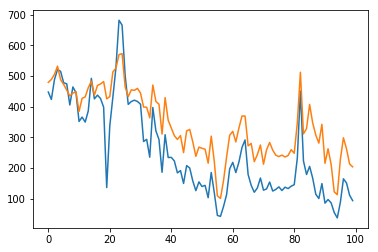

In [53]:
# Plotting them
plt.plot(y_test[0:100])
plt.plot(y_pred[0:100])

In [54]:
import algorithms

In [55]:
nonpar = algorithms.NonparametricRegression()

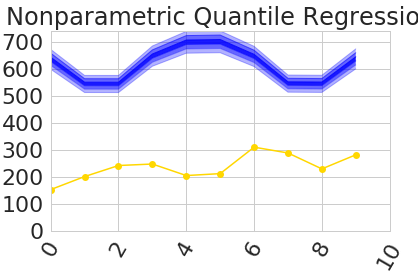

In [68]:
nonpar.fit(x_train, y_train)
nonpar.predict(x_test, y_test)
nonpar.plot_results()
plt.show()

In [42]:
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn